In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading data 
data = pd.read_csv("bank.csv", delimiter = ";")
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
#getting details of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [4]:
#getting info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6cda301fd0>,
      dtype=object)

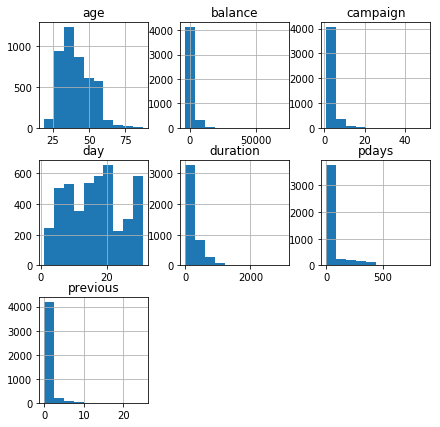

In [5]:
#visualizind distribution=
data.hist(figsize = (7,7))

In [6]:
data.shape

(4521, 17)

In [7]:
# #Replacing yes with 1 and no with 0 in y column of our data 
data.y.replace(('yes', 'no'), (1, 0), inplace=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [11]:
# #dividing data into feature and label
Y = pd.DataFrame(data['y'])
X = data.drop(['y'], axis=1)
Y = np.array(Y)
X = np.array(X)

In [12]:
# Encoding Categorical Data
labelencoder_X = LabelEncoder()

for i in range(16):
    X[:, i] = labelencoder_X.fit_transform(X[:, i])

onehotencoder = OneHotEncoder(categorical_features = "all", sparse=True)

X = onehotencoder.fit_transform(X).toarray()
Y = np.array(data.y)

In [14]:
X, Y

(array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]]), array([0, 0, 0, ..., 0, 0, 0]))

In [12]:
X, Y = shuffle(X, Y, random_state = 5)

In [13]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.23)

In [14]:
l_rate = 0.001
epochs = 1000
cost_history = np.empty(shape = [1], dtype = float)
n_dim = X.shape[1]
n_class = 2
model_path = "/home/admin1/Machine learning"

In [15]:
#Defining the number of hidden layers and number of neurons 
n_hidden_1 = 78
n_hidden_2 = 48
n_hidden_3 = 82
n_hidden_4 = 72
n_hidden_5 = 69


x = tf.placeholder(tf.float32,[None, n_dim])

w = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))

y1 = tf.placeholder(tf.float32,[None, n_class])


Instructions for updating:
Colocations handled automatically by placer.


In [16]:
def multilinear_perceptron(x, weight, biases):
    layer_1 = tf.add(tf.matmul(x, weight['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weight['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    layer_3 = tf.add(tf.matmul(layer_2, weight['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)

    layer_4 = tf.add(tf.matmul(layer_3, weight['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)

    layer_5 = tf.add(tf.matmul(layer_4, weight['h5']), biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    out_layer = tf.matmul(layer_5, weight['out']) + biases['out']
    
    return out_layer



In [17]:
#defining weights and biases for each layer
weights = {
    'h1':tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2':tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5':tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_5, n_class]))
  
}

biases = {
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5':tf.Variable(tf.truncated_normal([n_hidden_5])),
    'out':tf.Variable(tf.truncated_normal([n_class]))
  
}

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [18]:
y = multilinear_perceptron(x, weights, biases)

In [102]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y1))
training_step = tf.train.GradientDescentOptimizer(l_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []


for epoch in range(epochs):
    sess.run(training_step, feed_dict = {x:train_x, y:train_y})
    cost = sess.run(cost_function, feed_dict = {x:train_x, y:train_y})
    cost_history = np.append(cost_history, cost)
    correct_pred = tf.equal(tf.argmax(y,1), tf.argmax(y1,1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    pred_y = sess.run(y, feed_dict = {x:test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse1 = sess.run(mse)
    mse_history.append(mse1)
    accuracy = sess.run(accuracy, feed_dict = {x:train_x, y:train_y})
    accuracy_history.append(accuracy)
    
    save_path = saver.save(sess, model_path)
    
plt.plot(mse_history, 'r')
plt.show()
plt.plot(accuracy_history)
plt.show()

correct_pred = tf.equal(tf.argmax(y,1), tf.argmax(y1,1))
accuracy = tf.reduce(tf.cast(correct_pred, tf.float32))
print(accuracy)

pred_y = sess.run(y, feed_dict = {x:test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print(mse)

ValueError: could not convert string to float: 'yes'